In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 11


In [2]:
# Possible locations relative to the notebook
possible_2a_paths = [
    "cleaned_data/cleaned_table_2a.xlsx",
    "cleaned_table_2a.xlsx",
    "data/cleaned_table_2a.xlsx",
]

possible_2c_paths = [
    "cleaned_data/cleaned_table_2c.xlsx",
    "cleaned_table_2c.xlsx",
    "data/cleaned_table_2c.xlsx",
]

def find_existing(paths):
    for p in paths:
        if os.path.exists(p):
            return p
    return None

path_2a = find_existing(possible_2a_paths)
path_2c = find_existing(possible_2c_paths)

if path_2a is None or path_2c is None:
    raise FileNotFoundError(
        f"Could not find cleaned_table_2a.xlsx or cleaned_table_2c.xlsx.\n"
        f"Looked for 2a in: {possible_2a_paths}\n"
        f"Looked for 2c in: {possible_2c_paths}"
    )

print(f"Using 2a file: {path_2a}")
print(f"Using 2c file: {path_2c}")

df2a = pd.read_excel(path_2a)
df2c = pd.read_excel(path_2c)

print("\n=== Table 2a (head) ===")
display(df2a.head())

print("\n=== Table 2c (head) ===")
display(df2c.head())


Using 2a file: cleaned_data/cleaned_table_2a.xlsx
Using 2c file: cleaned_data/cleaned_table_2c.xlsx

=== Table 2a (head) ===


,Region,Total number of referrals entering treatment,<28 days,29-56 days,57-90 days,>90 days,<6 weeks,<18 weeks,Average waiting time days),Ended prior to treatment
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,England total,815665.0,545323.0,154868.0,57333.0,58141.0,642258.0,783238.0,32.0,416364.0
2,London Commissioning Region,124880.0,85245.0,24065.0,7860.0,7715.0,100550.0,120270.0,30.8,65230.0
3,Midlands and East of England Commissioning Region,237190.0,156495.0,42050.0,18440.0,20205.0,182145.0,225750.0,33.8,116105.0
4,North of England Commissioning Region,243215.0,148640.0,49390.0,21540.0,23645.0,178025.0,230035.0,37.7,152585.0



=== Table 2c (head) ===


,Problem Descriptor,Total Referrals to Treatment,<28 days,29-56 days,57-90 days,>90 days,<6 weeks,<18 weeks,Average Time,Ended prior to treatment
0,Anxiety and stress related disorders (Total),296665,199942,56326,20699,19698,235196,285961,31.0,50365
1,Agoraphobia,3815,2518,797,246,254,3007,3673,33.1,362
2,Generalized anxiety disorder,71471,49404,13517,4620,3930,58038,69332,28.9,13570
3,Mixed anxiety and depressive disorder,150364,100452,28490,11057,10365,118022,144961,31.1,29635
4,Obsessive-compulsive disorder,10519,6432,2201,836,1050,7812,9855,38.9,1077


In [3]:
# Strip whitespace from column names
df2a.columns = df2a.columns.str.strip()
df2c.columns = df2c.columns.str.strip()

# Rename to common names
rename_2a = {
    "Total number of referrals entering treatment": "total_entered",
    "<28 days": "lt_28",
    "29-56 days": "d29_56",
    "57-90 days": "d57_90",
    ">90 days": "gt_90",
    "<6 weeks": "lt_6w",
    "<18 weeks": "lt_18w",
    "Average waiting time days)": "avg_wait_days",
    "Ended prior to treatment": "ended_before",
}
rename_2c = {
    "Total Referrals to Treatment": "total_entered",
    "<28 days": "lt_28",
    "29-56 days": "d29_56",
    "57-90 days": "d57_90",
    ">90 days": "gt_90",
    "<6 weeks": "lt_6w",
    "<18 weeks": "lt_18w",
    "Average Time": "avg_wait_days",
    "Ended prior to treatment": "ended_before",
}

df2a = df2a.rename(columns=rename_2a)
df2c = df2c.rename(columns=rename_2c)

# Remove the first row in 2a if it is a blank header/spacer row
df2a = df2a.dropna(subset=["Region"]).copy()

# Coerce numeric columns
numeric_cols_2a = [
    "total_entered",
    "lt_28",
    "d29_56",
    "d57_90",
    "gt_90",
    "lt_6w",
    "lt_18w",
    "avg_wait_days",
    "ended_before",
]
numeric_cols_2c = [
    "total_entered",
    "lt_28",
    "d29_56",
    "d57_90",
    "gt_90",
    "lt_6w",
    "lt_18w",
    "avg_wait_days",
    "ended_before",
]

for col in numeric_cols_2a:
    df2a[col] = pd.to_numeric(df2a[col], errors="coerce")

for col in numeric_cols_2c:
    df2c[col] = pd.to_numeric(df2c[col], errors="coerce")

print("=== Cleaned Table 2a info ===")
display(df2a.info())

print("\n=== Cleaned Table 2c info ===")
display(df2c.info())


=== Cleaned Table 2a info ===
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 1 to 5
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         5 non-null      object 
 1   total_entered  5 non-null      float64
 2   lt_28          5 non-null      float64
 3   d29_56         5 non-null      float64
 4   d57_90         5 non-null      float64
 5   gt_90          5 non-null      float64
 6   lt_6w          5 non-null      float64
 7   lt_18w         5 non-null      float64
 8   avg_wait_days  5 non-null      float64
 9   ended_before   5 non-null      float64
dtypes: float64(9), object(1)
memory usage: 440.0+ bytes


None


=== Cleaned Table 2c info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Problem Descriptor  15 non-null     object 
 1   total_entered       15 non-null     int64  
 2   lt_28               15 non-null     int64  
 3   d29_56              15 non-null     int64  
 4   d57_90              15 non-null     int64  
 5   gt_90               15 non-null     int64  
 6   lt_6w               15 non-null     int64  
 7   lt_18w              15 non-null     int64  
 8   avg_wait_days       15 non-null     float64
 9   ended_before        15 non-null     int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 1.3+ KB


None

In [4]:
df2a_region = df2a.copy()

# Total referrals that reached a decision point (enter or ended-before)
df2a_region["total_referred"] = df2a_region["total_entered"] + df2a_region["ended_before"]

time_cols = ["lt_28", "d29_56", "d57_90", "gt_90", "lt_6w", "lt_18w"]

for col in time_cols:
    df2a_region[f"{col}_rate"] = (
        df2a_region[col] / df2a_region["total_entered"] * 100
    )

df2a_region["ended_before_rate"] = (
    df2a_region["ended_before"] / df2a_region["total_referred"] * 100
)

print("=== Region-level summary (Table 2a) ===")
display(
    df2a_region[
        [
            "Region",
            "total_entered",
            "avg_wait_days",
            "ended_before",
            "ended_before_rate",
        ]
        + [f"{c}_rate" for c in ["lt_28", "d29_56", "d57_90", "gt_90"]]
    ]
)

#Rename Commissioning Regions by removing "Commissioning Region" word
df2a_region["Region"] = df2a_region["Region"].str.replace("Commissioning Region", "").str.strip()

=== Region-level summary (Table 2a) ===


,Region,total_entered,avg_wait_days,ended_before,ended_before_rate,lt_28_rate,d29_56_rate,d57_90_rate,gt_90_rate
1,England total,815665.0,32.0,416364.0,33.794984,66.856246,18.986716,7.028989,7.128049
2,London Commissioning Region,124880.0,30.8,65230.0,34.311714,68.261531,19.270500,6.294042,6.177931
3,Midlands and East of England Commissioning Region,237190.0,33.8,116105.0,32.863471,65.978751,17.728403,7.774358,8.518487
4,North of England Commissioning Region,243215.0,37.7,152585.0,38.551036,61.114652,20.307136,8.856362,9.721851
5,South of England Commissioning Region,209535.0,23.9,81330.0,27.961425,73.655952,18.720023,4.507600,3.116424


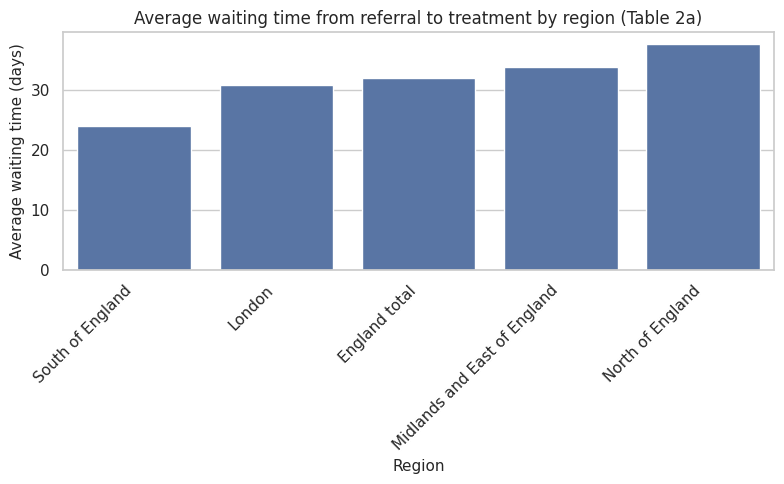

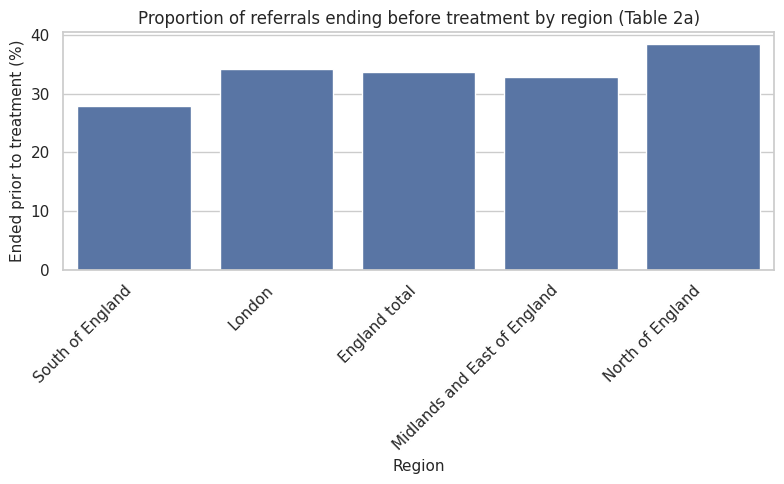

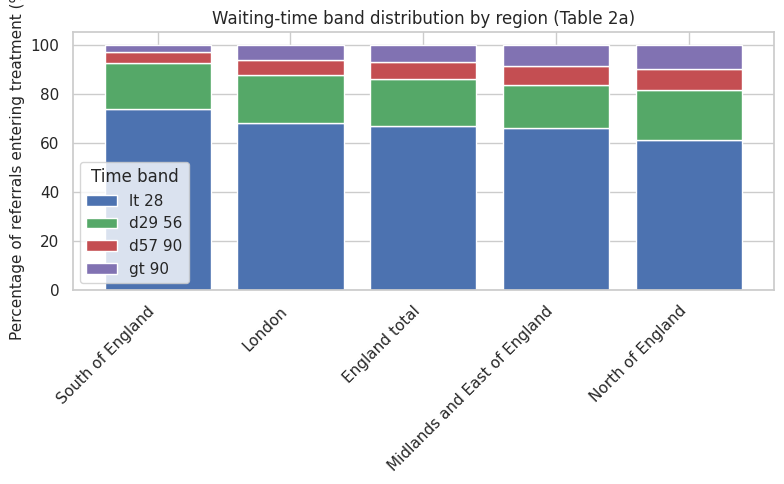

In [5]:
# Sort regions by average waiting time
df2a_region_sorted = df2a_region.sort_values("avg_wait_days")

# Average waiting time by region
plt.figure()
sns.barplot(
    data=df2a_region_sorted,
    x="Region",
    y="avg_wait_days",
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average waiting time (days)")
plt.title("Average waiting time from referral to treatment by region (Table 2a)")
plt.tight_layout()
plt.show()

# Percentage of referrals ending before treatment
plt.figure()
sns.barplot(
    data=df2a_region_sorted,
    x="Region",
    y="ended_before_rate",
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Ended prior to treatment (%)")
plt.title("Proportion of referrals ending before treatment by region (Table 2a)")
plt.tight_layout()
plt.show()

# Stacked bar of waiting-time bands (<28, 29–56, 57–90, >90 days)
waiting_band_rates = df2a_region_sorted[
    ["Region"] + [f"{c}_rate" for c in ["lt_28", "d29_56", "d57_90", "gt_90"]]
].set_index("Region")

plt.figure(figsize=(8, 5))
bottom = np.zeros(len(waiting_band_rates))

colors = {
    "lt_28_rate": "#4c72b0",
    "d29_56_rate": "#55a868",
    "d57_90_rate": "#c44e52",
    "gt_90_rate": "#8172b2",
}

for col in ["lt_28_rate", "d29_56_rate", "d57_90_rate", "gt_90_rate"]:
    vals = waiting_band_rates[col].values
    plt.bar(
        waiting_band_rates.index,
        vals,
        bottom=bottom,
        label=col.replace("_rate", "").replace("_", " "),
        color=colors[col],
    )
    bottom += vals

plt.xticks(rotation=45, ha="right")
plt.ylabel("Percentage of referrals entering treatment (%)")
plt.title("Waiting-time band distribution by region (Table 2a)")
plt.legend(title="Time band")
plt.tight_layout()
plt.show()


In [6]:
df2c_problem = df2c.copy()

# Total referrals that reached a decision point
df2c_problem["total_referred"] = (
    df2c_problem["total_entered"] + df2c_problem["ended_before"]
)

for col in time_cols:
    df2c_problem[f"{col}_rate"] = (
        df2c_problem[col] / df2c_problem["total_entered"] * 100
    )

df2c_problem["ended_before_rate"] = (
    df2c_problem["ended_before"] / df2c_problem["total_referred"] * 100
)

print("=== Problem-descriptor-level summary (Table 2c – all rows) ===")
display(
    df2c_problem[
        [
            "Problem Descriptor",
            "total_entered",
            "avg_wait_days",
            "ended_before",
            "ended_before_rate",
        ]
        + [f"{c}_rate" for c in ["lt_28", "d29_56", "d57_90", "gt_90"]]
    ]
)


=== Problem-descriptor-level summary (Table 2c – all rows) ===


,Problem Descriptor,total_entered,avg_wait_days,ended_before,ended_before_rate,lt_28_rate,d29_56_rate,d57_90_rate,gt_90_rate
0,Anxiety and stress related disorders (Total),296665,31.0,50365,14.513154,67.396558,18.986399,6.977230,6.639813
1,Agoraphobia,3815,33.1,362,8.666507,66.002621,20.891219,6.448231,6.657929
2,Generalized anxiety disorder,71471,28.9,13570,15.957009,69.124540,18.912566,6.464160,5.498734
3,Mixed anxiety and depressive disorder,150364,31.1,29635,16.463980,66.805884,18.947354,7.353489,6.893272
4,Obsessive-compulsive disorder,10519,38.9,1077,9.287685,61.146497,20.924042,7.947524,9.981937
5,Other anxiety or stress related disorder,17757,27.4,1909,9.707109,72.185617,16.247114,5.845582,5.721687
6,Panic disorder (episodic paroxysmal anxiety),13661,27.9,1180,7.950947,71.129493,18.329551,5.797526,4.743430
7,Post-traumatic stress disorder,14185,39.0,1686,10.623149,61.903419,20.747268,7.571378,9.777934
8,Social phobias,10408,32.2,620,5.622053,66.583397,19.725211,6.860108,6.831284
9,Specific (isolated) phobias,4485,34.1,326,6.776138,64.437012,20.869565,7.179487,7.513935


In [7]:
mask_problem_only = ~df2c_problem["Problem Descriptor"].isin(
    ["England total"]
)

df2c_problem_only = df2c_problem[mask_problem_only].copy()

print("=== Problem types used for analysis (Table 2c) ===")
display(df2c_problem_only[["Problem Descriptor", "total_entered"]])


=== Problem types used for analysis (Table 2c) ===


,Problem Descriptor,total_entered
0,Anxiety and stress related disorders (Total),296665
1,Agoraphobia,3815
2,Generalized anxiety disorder,71471
3,Mixed anxiety and depressive disorder,150364
4,Obsessive-compulsive disorder,10519
5,Other anxiety or stress related disorder,17757
6,Panic disorder (episodic paroxysmal anxiety),13661
7,Post-traumatic stress disorder,14185
8,Social phobias,10408
9,Specific (isolated) phobias,4485


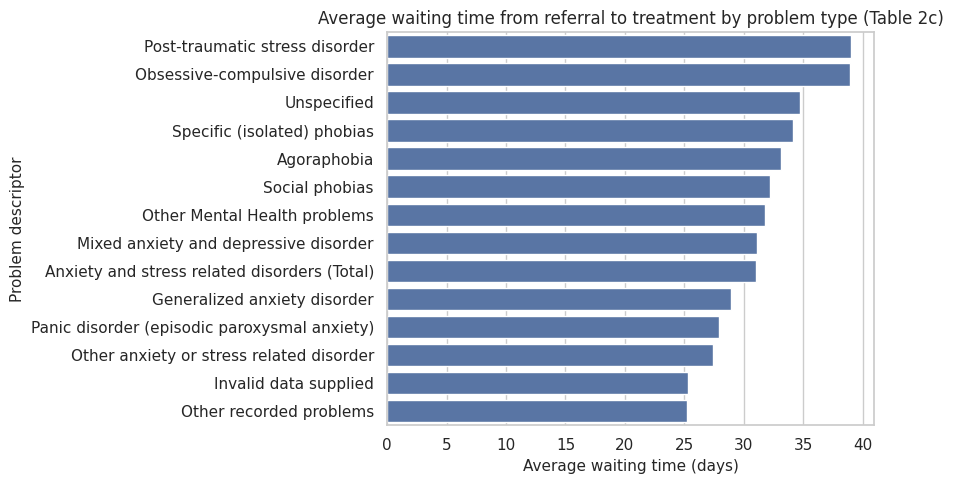

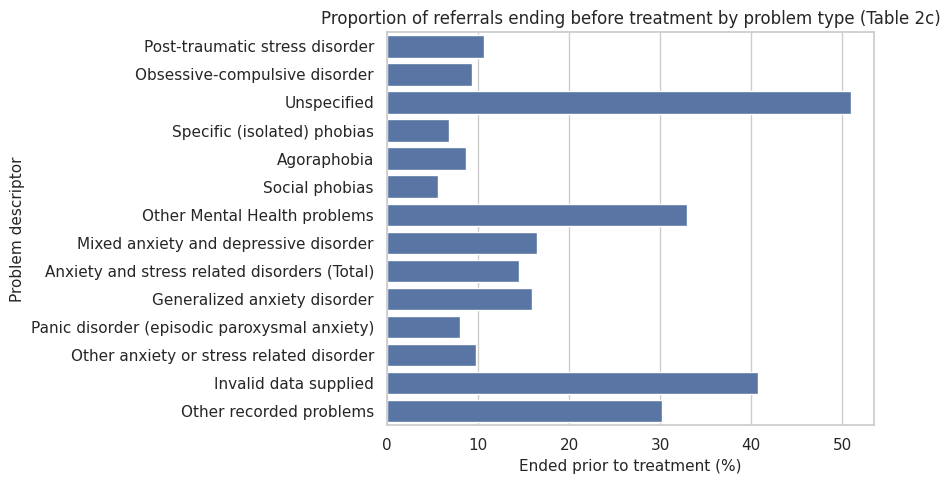

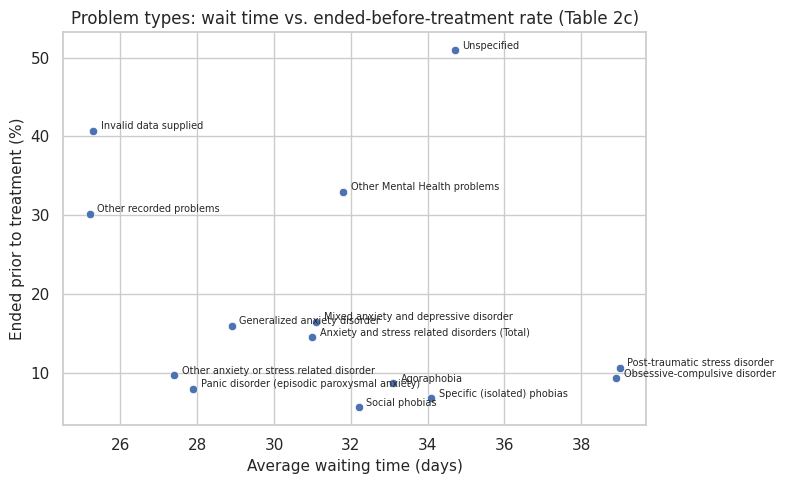

In [8]:
# Sort by average waiting time
df2c_sorted = df2c_problem_only.sort_values("avg_wait_days", ascending=False)

plt.figure(figsize=(9, 5))
sns.barplot(
    data=df2c_sorted,
    x="avg_wait_days",
    y="Problem Descriptor",
)
plt.xlabel("Average waiting time (days)")
plt.ylabel("Problem descriptor")
plt.title("Average waiting time from referral to treatment by problem type (Table 2c)")
plt.tight_layout()
plt.show()

# Ended-before-treatment percentage by problem type
plt.figure(figsize=(9, 5))
sns.barplot(
    data=df2c_sorted,
    x="ended_before_rate",
    y="Problem Descriptor",
)
plt.xlabel("Ended prior to treatment (%)")
plt.ylabel("Problem descriptor")
plt.title("Proportion of referrals ending before treatment by problem type (Table 2c)")
plt.tight_layout()
plt.show()

# Relationship between average wait and ended-before rate
plt.figure()
sns.scatterplot(
    data=df2c_problem_only,
    x="avg_wait_days",
    y="ended_before_rate",
)
for _, row in df2c_problem_only.iterrows():
    plt.text(
        row["avg_wait_days"] + 0.2,
        row["ended_before_rate"] + 0.2,
        row["Problem Descriptor"],
        fontsize=7,
    )
plt.xlabel("Average waiting time (days)")
plt.ylabel("Ended prior to treatment (%)")
plt.title("Problem types: wait time vs. ended-before-treatment rate (Table 2c)")
plt.tight_layout()
plt.show()


In [9]:
eng_2a = df2a_region[df2a_region["Region"] == "England total"].iloc[0]
eng_2c = df2c_problem[df2c_problem["Problem Descriptor"] == "England total"].iloc[0]

comparison = pd.DataFrame(
    {
        "metric": [
            "total_entered",
            "avg_wait_days",
            "lt_28_rate",
            "d29_56_rate",
            "d57_90_rate",
            "gt_90_rate",
            "lt_6w_rate",
            "lt_18w_rate",
            "ended_before_rate",
        ],
        "table_2a": [
            eng_2a["total_entered"],
            eng_2a["avg_wait_days"],
            eng_2a["lt_28_rate"],
            eng_2a["d29_56_rate"],
            eng_2a["d57_90_rate"],
            eng_2a["gt_90_rate"],
            eng_2a["lt_6w_rate"],
            eng_2a["lt_18w_rate"],
            eng_2a["ended_before_rate"],
        ],
        "table_2c": [
            eng_2c["total_entered"],
            eng_2c["avg_wait_days"],
            eng_2c["lt_28_rate"],
            eng_2c["d29_56_rate"],
            eng_2c["d57_90_rate"],
            eng_2c["gt_90_rate"],
            eng_2c["lt_6w_rate"],
            eng_2c["lt_18w_rate"],
            eng_2c["ended_before_rate"],
        ],
    }
)

comparison["difference"] = comparison["table_2a"] - comparison["table_2c"]

print("=== England total: comparison between Tables 2a and 2c ===")
display(comparison)


=== England total: comparison between Tables 2a and 2c ===


,metric,table_2a,table_2c,difference
0,total_entered,815665.000000,815665.000000,0.0
1,avg_wait_days,32.000000,32.000000,0.0
2,lt_28_rate,66.856246,66.856246,0.0
3,d29_56_rate,18.986716,18.986716,0.0
4,d57_90_rate,7.028989,7.028989,0.0
5,gt_90_rate,7.128049,7.128049,0.0
6,lt_6w_rate,78.740414,78.740414,0.0
7,lt_18w_rate,96.024471,96.024471,0.0
8,ended_before_rate,33.794984,33.794984,0.0


In [10]:
print("=== High-level observations from combined 2a & 2c analysis ===\n")

# Region with highest and lowest average waiting time
reg_max_wait = df2a_region.loc[df2a_region["avg_wait_days"].idxmax()]
reg_min_wait = df2a_region.loc[df2a_region["avg_wait_days"].idxmin()]

print(
    f"- Longest average wait by region: {reg_max_wait['Region']} "
    f"({reg_max_wait['avg_wait_days']:.1f} days)."
)
print(
    f"- Shortest average wait by region: {reg_min_wait['Region']} "
    f"({reg_min_wait['avg_wait_days']:.1f} days)."
)

# Region with highest and lowest ended-before-treatment rate
reg_max_ended = df2a_region.loc[df2a_region["ended_before_rate"].idxmax()]
reg_min_ended = df2a_region.loc[df2a_region["ended_before_rate"].idxmin()]

print(
    f"- Highest proportion ending before treatment: {reg_max_ended['Region']} "
    f"({reg_max_ended['ended_before_rate']:.1f}%)."
)
print(
    f"- Lowest proportion ending before treatment: {reg_min_ended['Region']} "
    f"({reg_min_ended['ended_before_rate']:.1f}%)."
)

# Problem types with extremes in average waiting time
prob_max_wait = df2c_problem_only.loc[df2c_problem_only["avg_wait_days"].idxmax()]
prob_min_wait = df2c_problem_only.loc[df2c_problem_only["avg_wait_days"].idxmin()]

print(
    f"- Longest average wait by problem type: {prob_max_wait['Problem Descriptor']} "
    f"({prob_max_wait['avg_wait_days']:.1f} days)."
)
print(
    f"- Shortest average wait by problem type: {prob_min_wait['Problem Descriptor']} "
    f"({prob_min_wait['avg_wait_days']:.1f} days)."
)

# Problem types with extremes in ended-before-treatment rate
prob_max_ended = df2c_problem_only.loc[df2c_problem_only["ended_before_rate"].idxmax()]
prob_min_ended = df2c_problem_only.loc[df2c_problem_only["ended_before_rate"].idxmin()]

print(
    f"- Highest ended-before-treatment rate: {prob_max_ended['Problem Descriptor']} "
    f"({prob_max_ended['ended_before_rate']:.1f}%)."
)
print(
    f"- Lowest ended-before-treatment rate: {prob_min_ended['Problem Descriptor']} "
    f"({prob_min_ended['ended_before_rate']:.1f}%)."
)

# Correlation between average wait and ended-before-treatment across problem types
corr_val = df2c_problem_only[["avg_wait_days", "ended_before_rate"]].corr().iloc[0, 1]
print(
    f"- Correlation between average waiting time and ended-before-treatment "
    f"(by problem type, Table 2c): {corr_val:.3f}."
)


=== High-level observations from combined 2a & 2c analysis ===

- Longest average wait by region: North of England Commissioning Region (37.7 days).
- Shortest average wait by region: South of England Commissioning Region (23.9 days).
- Highest proportion ending before treatment: North of England Commissioning Region (38.6%).
- Lowest proportion ending before treatment: South of England Commissioning Region (28.0%).
- Longest average wait by problem type: Post-traumatic stress disorder (39.0 days).
- Shortest average wait by problem type: Other recorded problems (25.2 days).
- Highest ended-before-treatment rate: Unspecified (50.9%).
- Lowest ended-before-treatment rate: Social phobias (5.6%).
- Correlation between average waiting time and ended-before-treatment (by problem type, Table 2c): -0.250.
